# Plotting Notebook
This notebook displays and manipulates the histograms produced by `make_plots.py`. <br>
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import os, sys, glob
import uproot
import pickle
import math
import itertools
import warnings
import json
import numpy as np
from typing import Dict, List
from rich.pretty import pprint
from rich.console import Console
from rich.table import Table
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import hist
from hist import Hist
import mplhep as hep
from tabulate import tabulate
import scipy
%aimport plot_utils
%aimport plot_utils_extras
%aimport fill_utils

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.style.use(hep.style.CMS)

In [4]:
plotDir = '../../../combine_stuff/CMSSW_11_3_4/src/plots.root'
regions = ['SR', 'CR_prompt', 'CR_cb']
fits = ['prefit', 'postfit']
processes = [
    'VVV',
    'ttZJets',
    'WJets_all',
    'ST',
    'VV',
    'TTJets',
    'DYLowMass_NLO',
    'DYJetsToLL_NLO',
    'QCD_Pt_MuEnriched',
]
signal = 'SUEP-m125-darkPhoHad'
data = 'data_obs'
plots = {}
with uproot.open(plotDir) as file:
    for f, r, p in itertools.product(fits, regions, processes + [data, signal]):
        if f not in plots.keys():
            plots[f] = {}
        if r not in plots[f].keys():
            plots[f][r] = {}
        if p not in plots[f][r].keys():
            plots[f][r][p] = {}
        plots[f][r][p] = file[f'{r}_{f}/{p}'].to_hist()

KeyInFileError: not found: 'DYLowMass_NLO' (with any cycle number)

    Available keys: 'DY_NLO_all;1', 'ST;1', 'data_obs;1', 'TotalSig;1', 'VV;1', 'WJets_all;1', 'TotalBkg;1', 'TotalProcs;1', 'VVV;1', 'TTJets;1', 'ttZJets;1', 'QCD_Pt_MuEnriched;1', 'SUEP-m125-darkPhoHad;1'

in file ../../../combine_stuff/CMSSW_11_3_4/src/plots.root

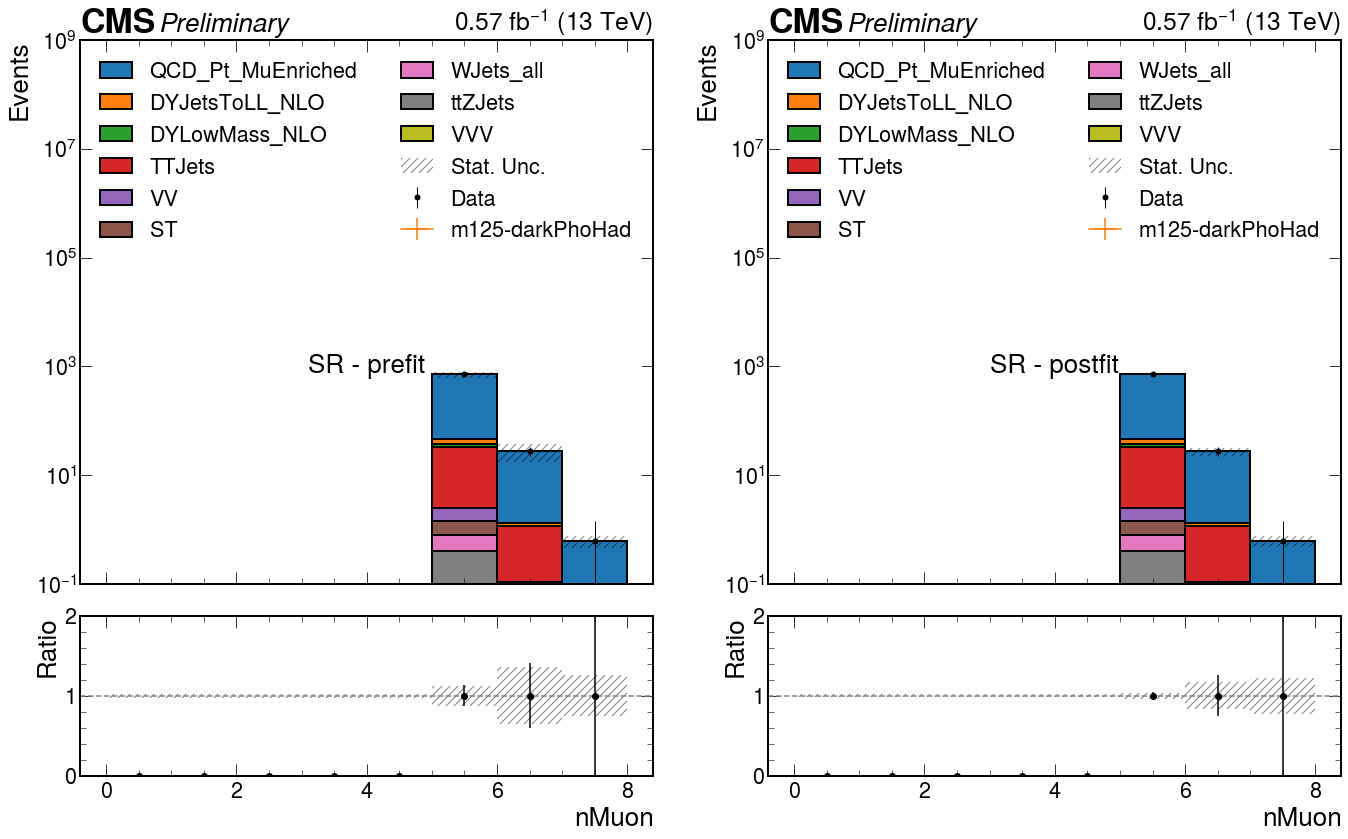

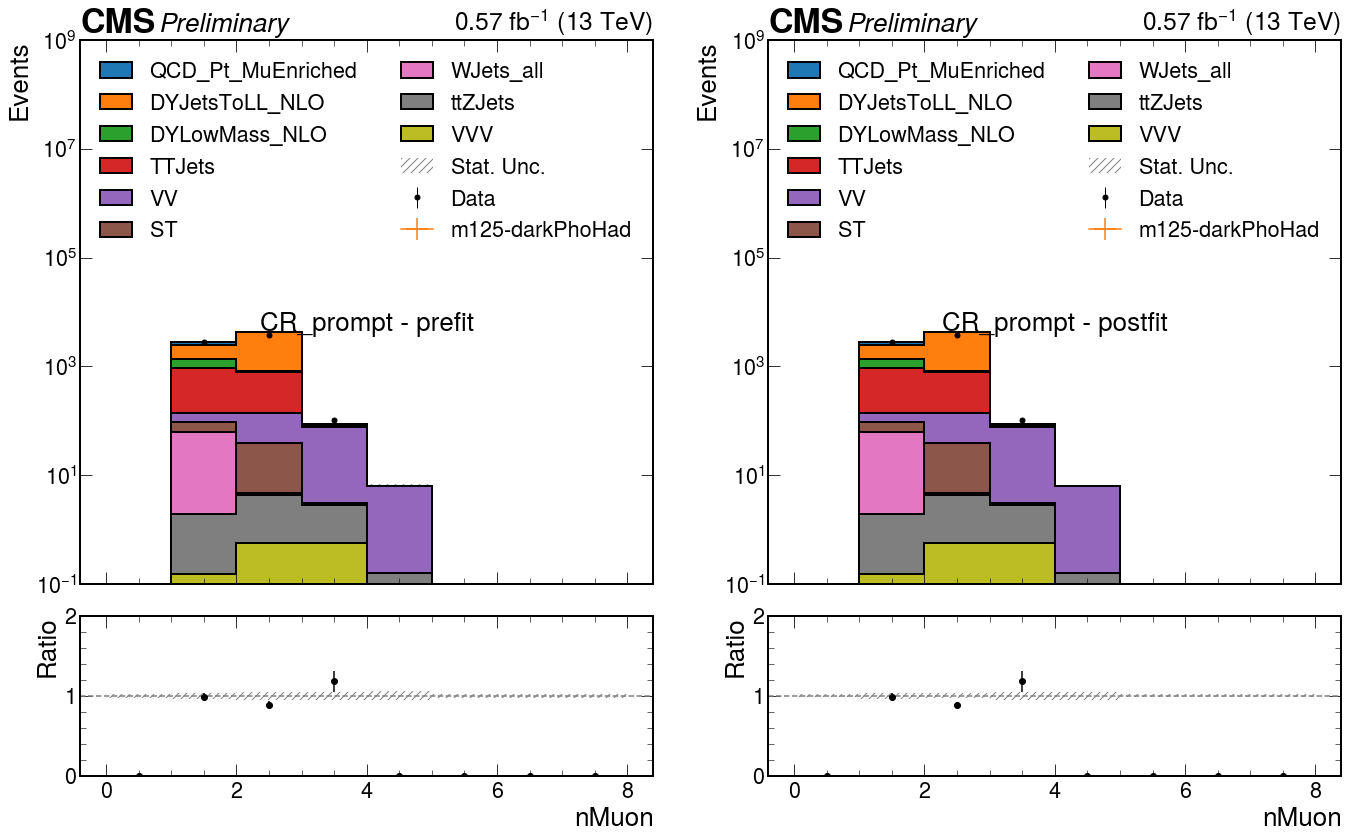

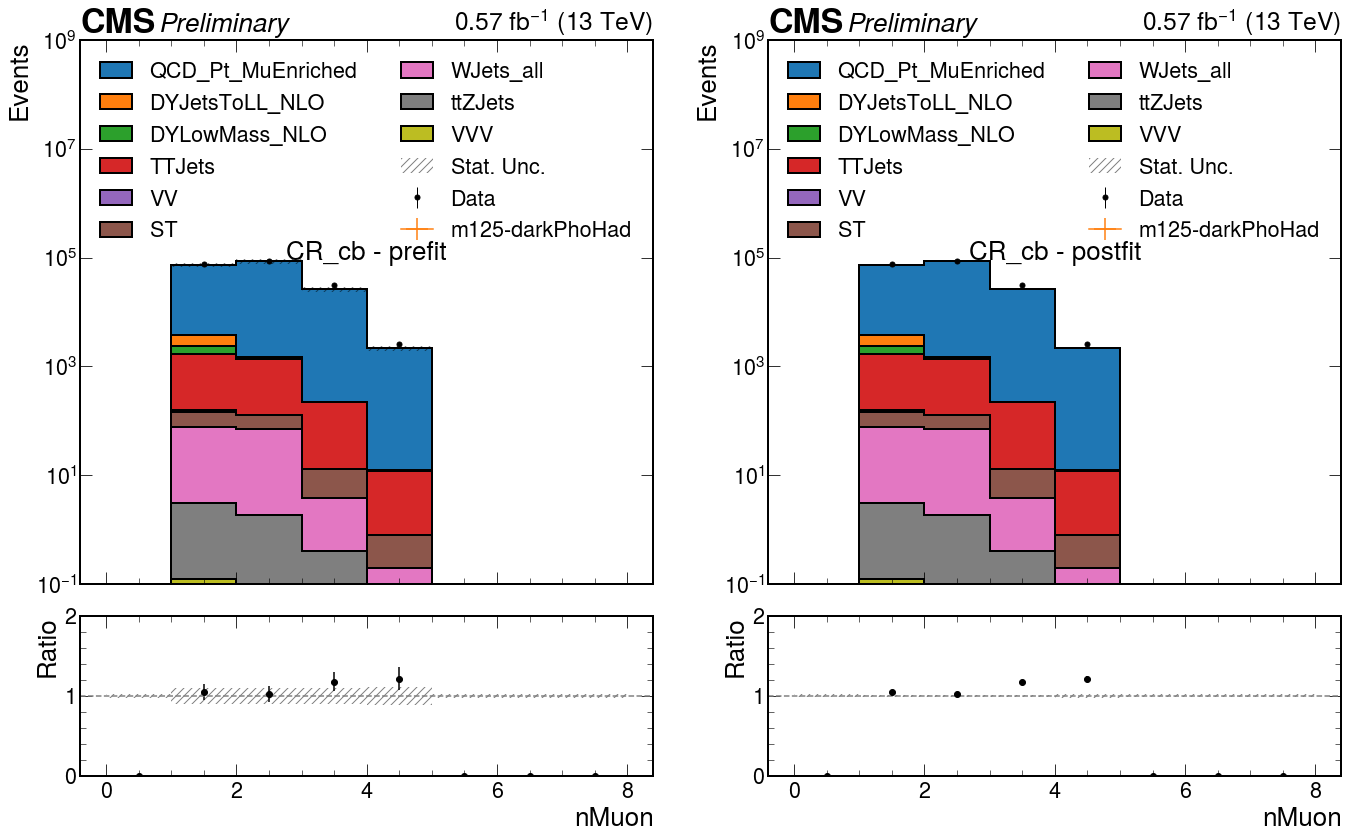

In [5]:
regions = ['SR', 'CR_prompt', 'CR_cb']
bkg_list = [
    'VVV',
    'ttZJets',
    'WJets_all',
    'ST',
    'VV',
    'TTJets',
    'DYLowMass_NLO',
    'DYJetsToLL_NLO',
    'QCD_Pt_MuEnriched',
]
sig_list = ['SUEP-m125-darkPhoHad']
int_lumi = 0.57
for region in regions:
    fig = plt.figure(figsize=(24, 14))
    G = gridspec.GridSpec(4, 2, figure=fig)
    left_gs = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=G[:, 0])
    right_gs = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=G[:, 1])
    plot_utils_extras.plot_ratio_stack_combine(
        plots=plots['prefit'][region], 
        bkg_list=bkg_list, 
        sig_list=sig_list,
        label=('nMuon','nMuon'),
        ylog=True,
        override_slice=True,
        int_lumi=int_lumi,
        fig=fig,
        gs=left_gs,
        text_to_show=f"{region} - prefit"
    )
    plot_utils_extras.plot_ratio_stack_combine(
        plots=plots['postfit'][region], 
        bkg_list=bkg_list, 
        sig_list=sig_list,
        label=('nMuon','nMuon'),
        ylog=True,
        override_slice=True,
        int_lumi=int_lumi,
        fig=fig,
        gs=right_gs,
        text_to_show=f"{region} - postfit"
    )